In [203]:
import sys
print(sys.executable)

/Users/hwang/.conda/envs/bayesian/bin/python


In [204]:
import math
import pylab 
import pymc3 as pm
import scipy
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import xarray as xr
from scipy import stats
from functools import reduce
from matplotlib import gridspec
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib as mpl
import statistics as stat
from collections import Counter

In [205]:
pwd

'/Users/hwang/Desktop/repo/academic-libraries-in-China'

In [206]:
# import data
docName_pilot = ['expenditureTotal', 'expenditureTotalAdjusted',
                 'expenditureLiteratureE','expenditureLiteratureP',
                 'expenditureLiteratureEAdjusted', 'expenditureLiteraturePAdjusted',
                'collection', 'collectionEB', 'collectionEJ', 'collectionPB', 'collectionPJ']
for doc in docName_pilot:
    exec("""%s = pd.read_pickle('./pilot/'+%s+'.pickle')""" % (doc, 'str(doc)'))

In [207]:
# look at what the data looks like for modeling
len([k for k, v in Counter(expenditureTotalAdjusted.school).items() if v==1])

AttributeError: 'DataFrame' object has no attribute 'school'

In [208]:
# standardize value
for x in range(0, expenditureTotalAdjusted.shape[0]):
    expenditureTotalAdjusted.iloc[x,:] = preprocessing.scale(expenditureTotalAdjusted.iloc[x,:])

In [209]:
expenditureTotalAdjusted

2010     2011     2012     2013     2014     2015  \
school                                                                         
北京大学图书馆                     nan -0.62239      nan -0.78856      nan      nan   
复旦大学图书馆                -0.68518 -0.76765 -0.20809  0.13010 -0.75983 -0.67282   
清华大学图书馆                -0.67305 -0.86181 -0.94315 -0.83234 -1.34878  0.62972   
上海交通大学图书馆              -0.69354      nan -0.84685 -0.81458  1.04792 -0.50371   
浙江大学图书馆                -1.39628      nan -0.58103 -0.76949 -0.68453 -0.87222   
中山大学图书馆                -0.91424 -0.93600 -0.72792 -0.86721 -0.61039 -0.51067   
同济大学图书馆                -1.00904 -0.34669      nan  2.08169 -1.40611  0.77349   
厦门大学图书馆                -1.46965  0.05633 -1.61730 -0.21148  0.77917 -0.45006   
东南大学图书馆                -0.76529      nan -1.11291 -1.60459 -0.37820  0.21724   
华东师范大学图书馆              -1.61671 -1.38570 -1.10501  0.23370  0.47510      nan   
上海大学图书馆                 1.87230 -0.28423 -0.04092  0.20348 -0.04999 -0.28134   
中南大学图书馆                -1.62935      nan      nan      nan      nan      nan   
内蒙古大学图书馆                1.06547  0.72568      nan      nan      nan      nan   
山东大学图书馆                -1.24863      nan -0.40715      nan      nan -1.14057   
电子科技大学图书馆              -0.22811 -1.08733 -0.45893      nan -0.69865  1.20633   
西安交通大学图书馆              -1.63267 -0.67165 -0.25162 -1.75529  0.16730  0.44943   
四川大学图书馆                -1.00365 -1.02389 -1.10399 -0.88193  0.95833  1.18390   
浙江理工大学图书馆               2.01801      nan  0.09770  0.42354 -0.66990      nan   
重庆大学图书馆                -1.33928 -1.49385 -0.73441  1.14623  0.09555 -1.06692   
郑州大学图书馆                 0.38485  0.36773      nan  0.34092 -1.78173 -1.24252   
南京师范大学图书馆              -0.46349 -2.18833 -0.85368 -0.53770  1.09757  0.10429   
西北工业大学图书馆              -0.82825 -1.58133 -1.48719 -0.21376  1.52775  0.19043   
四川农业大学图书馆               2.47424 -0.43474 -0.78924 -0.42722 -0.88624 -0.72329   
深圳大学图书馆                -0.88311      nan -0.69922 -1.30335 -0.74662  0.26059   
中国科学技术大学图书馆            -0.76261      nan      nan -0.95326 -0.84812 -1.15587   
华侨大学图书馆                 1.02562      nan  1.51240 -0.91943 -2.08588 -0.20900   
湖南大学图书馆                -0.63306 -0.59422 -0.13953 -0.98291 -1.00426  0.11508   
河海大学图书馆                 0.15952      nan -1.53804      nan      nan      nan   
浙江工业大学图书馆              -0.60511 -1.66243  0.28099  0.07597  0.10479 -0.39786   
大连理工大学图书馆              -1.56498 -1.06592      nan -0.33207 -0.59017 -0.26256   
华中师范大学图书馆              -0.14808 -0.32216 -0.41426 -0.77358      nan      nan   
东华大学图书馆                 0.32568  0.10585 -0.52749      nan  0.31915  0.50178   
兰州大学图书馆                -1.12418 -0.72748 -0.51295 -0.35044 -0.43225 -0.65628   
南京信息工程大学图书馆             1.84523      nan      nan -1.17053      nan      nan   
武汉理工大学图书馆              -1.34261 -0.90988 -1.50058 -0.55211  0.75312  0.33791   
上海海事大学图书馆               2.30254      nan  0.24424      nan  0.00842 -0.76706   
东北大学图书馆                -1.01726 -1.31266      nan  0.08042 -0.29027 -0.33835   
西安电子科技大学图书馆             0.77002 -2.45152 -0.45379      nan -0.03542 -0.51632   
哈尔滨工业大学图书馆              0.96128  1.78268      nan      nan      nan      nan   
华东理工大学图书馆              -1.64427  0.66379  1.32905 -1.62529 -0.85741 -0.13783   
西南科技大学图书馆               1.23003 -1.88165 -1.18026 -0.87008  0.13934  1.49269   
合肥工业大学图书馆              -0.48028 -1.15383 -1.43766 -1.01481  0.04847 -0.28528   
福州大学图书馆                -0.31833 -1.81013 -1.08968 -1.10689  0.42548  0.68071   
中南民族大学图书馆              -0.37706 -0.84667 -0.43501 -0.96694 -0.97211  0.07995   
杭州师范大学图书馆              -1.14217 -0.56220 -0.74389  0.52648  0.34465      nan   
成都东软学院图书馆               1.72666 -0.48130 -0.69861      nan      nan      nan   
南京农业大学图书馆              -1.29964 -0.47267 -1.13385 -0.47784 -1.09949  1.68588   
南京航空航天大学图书馆            -0.31695 -1.13256 -2.05675  0.47393      nan  0.23698   
南京邮电大学图书馆               0.0

In [210]:
# standardize year
expenditureTotalAdjusted.columns = list(preprocessing.scale(range(2010, 2019+1)))

In [211]:
# before melting dataframe, get the index to one column
expenditureTotalAdjusted = expenditureTotalAdjusted.reset_index()

In [161]:
expenditureTotalAdjusted

school  -1.5666989036012806  -1.2185435916898848  \
0                    北京大学图书馆                  nan             -0.62239   
1                    复旦大学图书馆             -0.68518             -0.76765   
2                    清华大学图书馆             -0.67305             -0.86181   
3                  上海交通大学图书馆             -0.69354                  nan   
4                    浙江大学图书馆             -1.39628                  nan   
5                    中山大学图书馆             -0.91424             -0.93600   
6                    同济大学图书馆             -1.00904             -0.34669   
7                    厦门大学图书馆             -1.46965              0.05633   
8                    东南大学图书馆             -0.76529                  nan   
9                  华东师范大学图书馆             -1.61671             -1.38570   
10                   上海大学图书馆              1.87230             -0.28423   
11                   中南大学图书馆             -1.62935                  nan   
12                  内蒙古大学图书馆              1.06547              0.72568   
13                   山东大学图书馆             -1.24863                  nan   
14                 电子科技大学图书馆             -0.22811             -1.08733   
15                 西安交通大学图书馆             -1.63267             -0.67165   
16                   四川大学图书馆             -1.00365             -1.02389   
17                 浙江理工大学图书馆              2.01801                  nan   
18                   重庆大学图书馆             -1.33928             -1.49385   
19                   郑州大学图书馆              0.38485              0.36773   
20                 南京师范大学图书馆             -0.46349             -2.18833   
21                 西北工业大学图书馆             -0.82825             -1.58133   
22                 四川农业大学图书馆              2.47424             -0.43474   
23                   深圳大学图书馆             -0.88311                  nan   
24               中国科学技术大学图书馆             -0.76261                  nan   
25                   华侨大学图书馆              1.02562                  nan   
26                   湖南大学图书馆             -0.63306             -0.59422   
27                   河海大学图书馆              0.15952                  nan   
28                 浙江工业大学图书馆             -0.60511             -1.66243   
29                 大连理工大学图书馆             -1.56498             -1.06592   
30                 华中师范大学图书馆             -0.14808             -0.32216   
31                   东华大学图书馆              0.32568              0.10585   
32                   兰州大学图书馆             -1.12418             -0.72748   
33               南京信息工程大学图书馆              1.84523                  nan   
34                 武汉理工大学图书馆             -1.34261             -0.90988   
35                 上海海事大学图书馆              2.30254                  nan   
36                   东北大学图书馆             -1.01726             -1.31266   
37               西安电子科技大学图书馆              0.77002             -2.45152   
38                哈尔滨工业大学图书馆              0.96128              1.78268   
39                 华东理工大学图书馆             -1.64427              0.66379   
40                 西南科技大学图书馆              1.23003             -1.88165   
41                 合肥工业大学图书馆             -0.48028             -1.15383   
42                   福州大学图书馆             -0.31833             -1.81013   
43                 中南民族大学图书馆             -0.37706             -0.84667   
44                 杭州师范大学图书馆             -1.14217             -0.56220   
45                 成都东软学院图书馆              1.72666             -0.48130   
46                 南京农业大学图书馆             -1.29964             -0.47267   
47               南京航空航天大学图书馆             -0.31695             -1.13256   
48                 南京邮电大学图书馆              0.00000                  nan   
49               上海第二工业大学图书馆              2.49161              0.30767   
50                 上海师范大学图书馆             -0.90638                  nan   
51               上海应用技术大学图书馆              2.76891             -0.41094   
52               首都经济贸易大学图书馆             -0.10633                  nan   
53                 浙江工商大学图

In [212]:
# add school_code to df
expenditureTotalAdjusted['code'] = expenditureTotalAdjusted.index

In [213]:
expenditureTotalAdjusted

school  -1.5666989036012806  -1.2185435916898848  \
0                    北京大学图书馆                  nan             -0.62239   
1                    复旦大学图书馆             -0.68518             -0.76765   
2                    清华大学图书馆             -0.67305             -0.86181   
3                  上海交通大学图书馆             -0.69354                  nan   
4                    浙江大学图书馆             -1.39628                  nan   
5                    中山大学图书馆             -0.91424             -0.93600   
6                    同济大学图书馆             -1.00904             -0.34669   
7                    厦门大学图书馆             -1.46965              0.05633   
8                    东南大学图书馆             -0.76529                  nan   
9                  华东师范大学图书馆             -1.61671             -1.38570   
10                   上海大学图书馆              1.87230             -0.28423   
11                   中南大学图书馆             -1.62935                  nan   
12                  内蒙古大学图书馆              1.06547              0.72568   
13                   山东大学图书馆             -1.24863                  nan   
14                 电子科技大学图书馆             -0.22811             -1.08733   
15                 西安交通大学图书馆             -1.63267             -0.67165   
16                   四川大学图书馆             -1.00365             -1.02389   
17                 浙江理工大学图书馆              2.01801                  nan   
18                   重庆大学图书馆             -1.33928             -1.49385   
19                   郑州大学图书馆              0.38485              0.36773   
20                 南京师范大学图书馆             -0.46349             -2.18833   
21                 西北工业大学图书馆             -0.82825             -1.58133   
22                 四川农业大学图书馆              2.47424             -0.43474   
23                   深圳大学图书馆             -0.88311                  nan   
24               中国科学技术大学图书馆             -0.76261                  nan   
25                   华侨大学图书馆              1.02562                  nan   
26                   湖南大学图书馆             -0.63306             -0.59422   
27                   河海大学图书馆              0.15952                  nan   
28                 浙江工业大学图书馆             -0.60511             -1.66243   
29                 大连理工大学图书馆             -1.56498             -1.06592   
30                 华中师范大学图书馆             -0.14808             -0.32216   
31                   东华大学图书馆              0.32568              0.10585   
32                   兰州大学图书馆             -1.12418             -0.72748   
33               南京信息工程大学图书馆              1.84523                  nan   
34                 武汉理工大学图书馆             -1.34261             -0.90988   
35                 上海海事大学图书馆              2.30254                  nan   
36                   东北大学图书馆             -1.01726             -1.31266   
37               西安电子科技大学图书馆              0.77002             -2.45152   
38                哈尔滨工业大学图书馆              0.96128              1.78268   
39                 华东理工大学图书馆             -1.64427              0.66379   
40                 西南科技大学图书馆              1.23003             -1.88165   
41                 合肥工业大学图书馆             -0.48028             -1.15383   
42                   福州大学图书馆             -0.31833             -1.81013   
43                 中南民族大学图书馆             -0.37706             -0.84667   
44                 杭州师范大学图书馆             -1.14217             -0.56220   
45                 成都东软学院图书馆              1.72666             -0.48130   
46                 南京农业大学图书馆             -1.29964             -0.47267   
47               南京航空航天大学图书馆             -0.31695             -1.13256   
48                 南京邮电大学图书馆              0.00000                  nan   
49               上海第二工业大学图书馆              2.49161              0.30767   
50                 上海师范大学图书馆             -0.90638                  nan   
51               上海应用技术大学图书馆              2.76891             -0.41094   
52               首都经济贸易大学图书馆             -0.10633                  nan   
53                 浙江工商大学图

In [214]:
# melt, dropna, and reset_index
expenditureTotalAdjusted_melted_tidy = pd.melt(expenditureTotalAdjusted, id_vars=['school', 'code'],
                                         var_name='zyear', value_name='zvalue').dropna().reset_index(drop=True)

In [215]:
# now we got tidy data
expenditureTotalAdjusted_melted_tidy = expenditureTotalAdjusted_melted_tidy.sort_values(by=['code']).reset_index(drop=True)

In [216]:
expenditureTotalAdjusted_melted_tidy

school  code    zyear   zvalue
0                    北京大学图书馆     0 -0.52223 -0.78856
1                    北京大学图书馆     0  1.56670  1.41096
2                    北京大学图书馆     0 -1.21854 -0.62239
3                    复旦大学图书馆     1 -1.56670 -0.68518
4                    复旦大学图书馆     1  0.52223 -0.67051
5                    复旦大学图书馆     1 -0.17408 -0.75983
6                    复旦大学图书馆     1  0.87039  1.41001
7                    复旦大学图书馆     1 -0.52223  0.13010
8                    复旦大学图书馆     1  1.21854  2.32447
9                    复旦大学图书馆     1 -0.87039 -0.20809
10                   复旦大学图书馆     1  1.56670 -0.10050
11                   复旦大学图书馆     1 -1.21854 -0.76765
12                   复旦大学图书馆     1  0.17408 -0.67282
13                   清华大学图书馆     2 -0.52223 -0.83234
14                   清华大学图书馆     2 -1.21854 -0.86181
15                   清华大学图书馆     2 -0.87039 -0.94315
16                   清华大学图书馆     2  0.52223  0.31279
17                   清华大学图书馆     2 -1.56670 -0.67305
18                   清华大学图书馆     2 -0.17408 -1.34878
19                   清华大学图书馆     2  0.17408  0.62972
20                   清华大学图书馆     2  1.56670  1.67185
21                   清华大学图书馆     2  0.87039  0.91584
22                   清华大学图书馆     2  1.21854  1.12894
23                 上海交通大学图书馆     3 -0.87039 -0.84685
24                 上海交通大学图书馆     3  0.17408 -0.50371
25                 上海交通大学图书馆     3  1.56670  2.31293
26                 上海交通大学图书馆     3 -0.52223 -0.81458
27                 上海交通大学图书馆     3 -1.56670 -0.69354
28                 上海交通大学图书馆     3  0.87039 -0.37819
29                 上海交通大学图书馆     3 -0.17408  1.04792
30                 上海交通大学图书馆     3  0.52223 -0.44020
31                 上海交通大学图书馆     3  1.21854  0.31621
32                   浙江大学图书馆     4  0.87039  1.33703
33                   浙江大学图书馆     4  1.56670  1.02531
34                   浙江大学图书馆     4 -1.56670 -1.39628
35                   浙江大学图书馆     4 -0.17408 -0.68453
36                   浙江大学图书馆     4  0.17408 -0.87222
37                   浙江大学图书馆     4 -0.87039 -0.58103
38                   浙江大学图书馆     4  0.52223  0.68057
39                   浙江大学图书馆     4 -0.52223 -0.76949
40                   浙江大学图书馆     4  1.21854  1.26065
41                   中山大学图书馆     5  1.21854  1.33531
42                   中山大学图书馆     5 -0.87039 -0.72792
43                   中山大学图书馆     5 -1.56670 -0.91424
44                   中山大学图书馆     5  0.52223  0.21755
45                   中山大学图书馆     5  0.87039  1.47856
46                   中山大学图书馆     5 -1.21854 -0.93600
47                   中山大学图书馆     5  0.17408 -0.51067
48                   中山大学图书馆     5  1.56670  1.53501
49                   中山大学图书馆     5 -0.17408 -0.61039
50                   中山大学图书馆     5 -0.52223 -0.86721
51                   同济大学图书馆     6 -1.21854 -0.34669
52                   同济大学图书馆     6  0.52223 -0.64355
53                   同济大学图书馆     6 -0.17408 -1.40611
54                   同济大学图书馆     6  1.21854  0.53202
55                   同济大学图书馆     6 -0.52223  2.08169
56                   同济大学图书馆     6  0.87039 -0.34824
57                   同济大学图书馆     6  1.56670  0.36643
58                   同济大学图书馆     6 -1.56670 -1.00904
59                   同济大学图书馆     6  0.17408  0.77349
60                   厦门大学图书馆     7  1.21854  0.66770
61                   厦门大学图书馆     7  0.87039  0.43540
62                   厦门大学图书馆     7 -1.56670 -1.46965
63                   厦门大学图书馆     7 -0.17408  0.77917
64                   厦门大学图书馆     7 -0.52223 -0.21148
65                   厦门大学图书馆     7  0.52223  1.92810
66                   厦门大学图书馆     7 -0.87039 -1.61730
67                   厦门大学图书馆     7  0.17408 -0.45006
68                   厦门大学图书馆     7 -1.21854  0.05633
69                   厦门大学图书馆     7  1.56670 -0.11821
70                   东南大学图书馆     8 -0.52223 -1.60459
71                   东南大学图书馆     8  1.56670  1.30302
72                   东南大学图书馆     8  0.52223  0.53041
73                   东南大学图书馆     8  1.21854  1.53484
74                   东南大学图书馆     8  0.17408  0.

In [217]:
# leave tidy data intact, for the real expeiment, ser
expenditureTotalAdjusted_melted = expenditureTotalAdjusted_melted_tidy.copy()

In [28]:
# # get df sorted and reset the index
# expenditureTotalAdjusted_melted=expenditureTotalAdjusted_melted.sort_values(by=['code']).reset_index()

In [218]:
expenditureTotalAdjusted_melted

school  code    zyear   zvalue
0                    北京大学图书馆     0 -0.52223 -0.78856
1                    北京大学图书馆     0  1.56670  1.41096
2                    北京大学图书馆     0 -1.21854 -0.62239
3                    复旦大学图书馆     1 -1.56670 -0.68518
4                    复旦大学图书馆     1  0.52223 -0.67051
5                    复旦大学图书馆     1 -0.17408 -0.75983
6                    复旦大学图书馆     1  0.87039  1.41001
7                    复旦大学图书馆     1 -0.52223  0.13010
8                    复旦大学图书馆     1  1.21854  2.32447
9                    复旦大学图书馆     1 -0.87039 -0.20809
10                   复旦大学图书馆     1  1.56670 -0.10050
11                   复旦大学图书馆     1 -1.21854 -0.76765
12                   复旦大学图书馆     1  0.17408 -0.67282
13                   清华大学图书馆     2 -0.52223 -0.83234
14                   清华大学图书馆     2 -1.21854 -0.86181
15                   清华大学图书馆     2 -0.87039 -0.94315
16                   清华大学图书馆     2  0.52223  0.31279
17                   清华大学图书馆     2 -1.56670 -0.67305
18                   清华大学图书馆     2 -0.17408 -1.34878
19                   清华大学图书馆     2  0.17408  0.62972
20                   清华大学图书馆     2  1.56670  1.67185
21                   清华大学图书馆     2  0.87039  0.91584
22                   清华大学图书馆     2  1.21854  1.12894
23                 上海交通大学图书馆     3 -0.87039 -0.84685
24                 上海交通大学图书馆     3  0.17408 -0.50371
25                 上海交通大学图书馆     3  1.56670  2.31293
26                 上海交通大学图书馆     3 -0.52223 -0.81458
27                 上海交通大学图书馆     3 -1.56670 -0.69354
28                 上海交通大学图书馆     3  0.87039 -0.37819
29                 上海交通大学图书馆     3 -0.17408  1.04792
30                 上海交通大学图书馆     3  0.52223 -0.44020
31                 上海交通大学图书馆     3  1.21854  0.31621
32                   浙江大学图书馆     4  0.87039  1.33703
33                   浙江大学图书馆     4  1.56670  1.02531
34                   浙江大学图书馆     4 -1.56670 -1.39628
35                   浙江大学图书馆     4 -0.17408 -0.68453
36                   浙江大学图书馆     4  0.17408 -0.87222
37                   浙江大学图书馆     4 -0.87039 -0.58103
38                   浙江大学图书馆     4  0.52223  0.68057
39                   浙江大学图书馆     4 -0.52223 -0.76949
40                   浙江大学图书馆     4  1.21854  1.26065
41                   中山大学图书馆     5  1.21854  1.33531
42                   中山大学图书馆     5 -0.87039 -0.72792
43                   中山大学图书馆     5 -1.56670 -0.91424
44                   中山大学图书馆     5  0.52223  0.21755
45                   中山大学图书馆     5  0.87039  1.47856
46                   中山大学图书馆     5 -1.21854 -0.93600
47                   中山大学图书馆     5  0.17408 -0.51067
48                   中山大学图书馆     5  1.56670  1.53501
49                   中山大学图书馆     5 -0.17408 -0.61039
50                   中山大学图书馆     5 -0.52223 -0.86721
51                   同济大学图书馆     6 -1.21854 -0.34669
52                   同济大学图书馆     6  0.52223 -0.64355
53                   同济大学图书馆     6 -0.17408 -1.40611
54                   同济大学图书馆     6  1.21854  0.53202
55                   同济大学图书馆     6 -0.52223  2.08169
56                   同济大学图书馆     6  0.87039 -0.34824
57                   同济大学图书馆     6  1.56670  0.36643
58                   同济大学图书馆     6 -1.56670 -1.00904
59                   同济大学图书馆     6  0.17408  0.77349
60                   厦门大学图书馆     7  1.21854  0.66770
61                   厦门大学图书馆     7  0.87039  0.43540
62                   厦门大学图书馆     7 -1.56670 -1.46965
63                   厦门大学图书馆     7 -0.17408  0.77917
64                   厦门大学图书馆     7 -0.52223 -0.21148
65                   厦门大学图书馆     7  0.52223  1.92810
66                   厦门大学图书馆     7 -0.87039 -1.61730
67                   厦门大学图书馆     7  0.17408 -0.45006
68                   厦门大学图书馆     7 -1.21854  0.05633
69                   厦门大学图书馆     7  1.56670 -0.11821
70                   东南大学图书馆     8 -0.52223 -1.60459
71                   东南大学图书馆     8  1.56670  1.30302
72                   东南大学图书馆     8  0.52223  0.53041
73                   东南大学图书馆     8  1.21854  1.53484
74                   东南大学图书馆     8  0.17408  0.

In [219]:
# transfer data to float to make it more computationally efficient
expenditureTotalAdjusted_melted.school = expenditureTotalAdjusted_melted.school.astype('string')
expenditureTotalAdjusted_melted.code = expenditureTotalAdjusted_melted.code.astype('category')
expenditureTotalAdjusted_melted.zyear = expenditureTotalAdjusted_melted.zyear.astype('float64')
expenditureTotalAdjusted_melted.zvalue = expenditureTotalAdjusted_melted.zvalue.astype('float64')
n_libraries = len(expenditureTotalAdjusted_melted.school.unique())
index = np.array(expenditureTotalAdjusted_melted.code)
# data is ready to be fed into the model

In [220]:
# pickle df for remote computing, use in need
expenditureTotalAdjusted_melted.to_pickle('./remote/ETAM.pickle')

In [ ]:
# here we start the pilot experiment

In [200]:
# # unit test
# len(expenditureTotalAdjusted_melted.code.unique())
# len(expenditureTotalAdjusted_melted.school.unique())
# len(list(set(expenditureTotalAdjusted_melted.school)))
# expenditureTotalAdjusted_melted.code.dtype

In [194]:
with pm.Model() as m1:
    #     index = np.array(expenditureTotalAdjusted_melted.code)
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0, sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 10)
    mu_b = pm.Normal('mu_b', mu=0, sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 10)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_libraries)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_libraries)

    # underlining trend for individual library
    sigma = pm.HalfNormal('sigma', 10)
    nu = pm.HalfNormal('nu', 10)

    mu = a[index] + b[index] * expenditureTotalAdjusted_melted.zyear

    # Data likelihood
    likelihood = pm.StudentT('likelihood', mu=mu,
                             sigma=sigma, nu=nu,
                             observed=expenditureTotalAdjusted_melted.zvalue)

In [231]:
with pm.Model() as m2:
    #     index = np.array(expenditureTotalAdjusted_melted.code)
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0, sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 10)
    mu_b = pm.Normal('mu_b', mu=0, sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 10)
    mu_c = pm.Normal('mu_c', mu=0, sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 10)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_libraries)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_libraries)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=n_libraries)

    # underlining trend for individual library
    sigma = pm.HalfNormal('sigma', 10)
    nu = pm.HalfNormal('nu', 10)

    mu = a[index] + b[index] * expenditureTotalAdjusted_melted.zyear + \
                    c[index] * np.power(expenditureTotalAdjusted_melted.zyear, 2)

    # Data likelihood
    likelihood = pm.StudentT('likelihood', mu=mu,
                             sigma=sigma, nu=nu,
                             observed=expenditureTotalAdjusted_melted.zvalue)

In [234]:
with pm.Model() as m3:
    #     index = np.array(expenditureTotalAdjusted_melted.code)
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0, sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 10)
    mu_b = pm.Normal('mu_b', mu=0, sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 10)
    mu_c = pm.Normal('mu_c', mu=0, sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 10)
    mu_d = pm.Normal('mu_d', mu=0, sigma=10)
    sigma_d = pm.HalfNormal('sigma_d', 10)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_libraries)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_libraries)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=n_libraries)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=n_libraries)

    # underlining trend for individual library
    sigma = pm.HalfNormal('sigma', 10)
    nu = pm.HalfNormal('nu', 10)

    mu = a[index] + b[index] * expenditureTotalAdjusted_melted.zyear + \
                    c[index] * np.power(expenditureTotalAdjusted_melted.zyear, 2) + \
                    d[index] * np.power(expenditureTotalAdjusted_melted.zyear, 2)

    # Data likelihood
    likelihood = pm.StudentT('likelihood', mu=mu,
                             sigma=sigma, nu=nu,
                             observed=expenditureTotalAdjusted_melted.zvalue)

In [199]:
with m1:
    m1_trace = pm.sample(50000, tune=50000, cores=4, init='auto')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, b, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling 4 chains, 4,193 divergences: 100%|██████████| 40000/40000 [04:26<00:00, 150.28draws/s]
There were 721 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5922018164577274, but should be close to 0.8. Try to increase the number of tuning steps.
There were 429 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2212 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.40978050642978914, but should be close to 0.8. Try to increase the number of tuning steps.
There were 831 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight pro

In [ ]:
with m2:
    m2_trace = pm.sample(50000, tune=50000, cores=4, init='auto')

In [235]:
with m3:
    m3_trace = pm.sample(500, tune=500, cores=4, init='auto')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, d, c, b, a, sigma_d, mu_d, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]
Sampling 4 chains, 0 divergences:   0%|          | 0/4000 [00:00<?, ?draws/s]

ValueError: Not enough samples to build a trace.

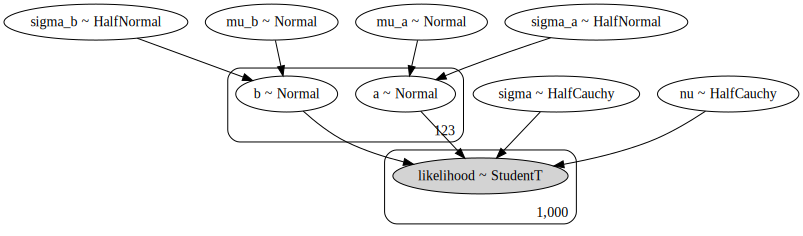

In [224]:
pm.model_to_graphviz(m1)

In [221]:
with m1:
    m1_trace = pm.load_trace(directory="./remote/m1_trace")

In [222]:
pm.summary(m1_trace)

mean      sd   hpd_3%  hpd_97%  mcse_mean  mcse_sd   ess_mean  \
mu_a    -0.04800 0.02400 -0.09400 -0.00400    0.00100  0.00100  438.00000   
mu_b     0.42800 0.04300  0.34500  0.50800    0.00200  0.00100  564.00000   
a[0]    -0.04800 0.03900 -0.12200  0.02700    0.00100  0.00100 1204.00000   
a[1]    -0.04900 0.03900 -0.12400  0.02600    0.00100  0.00100 1299.00000   
a[2]    -0.04700 0.03800 -0.12100  0.02600    0.00100  0.00100 1091.00000   
a[3]    -0.05100 0.03900 -0.12400  0.02500    0.00100  0.00100 1059.00000   
a[4]    -0.04900 0.03800 -0.12300  0.02400    0.00100  0.00100 1125.00000   
a[5]    -0.04800 0.03800 -0.12000  0.02700    0.00100  0.00100 1304.00000   
a[6]    -0.05000 0.03900 -0.12500  0.02300    0.00100  0.00100 1068.00000   
a[7]    -0.04800 0.03800 -0.12200  0.02600    0.00100  0.00100 1277.00000   
a[8]    -0.04900 0.03800 -0.12400  0.02500    0.00100  0.00100 1166.00000   
a[9]    -0.04700 0.03800 -0.12100  0.02700    0.00100  0.00100 1195.00000   
a[10]   -0.04800 0.03800 -0.12200  0.02500    0.00100  0.00100 1160.00000   
a[11]   -0.04900 0.03900 -0.12400  0.02400    0.00100  0.00100 1189.00000   
a[12]   -0.04600 0.03900 -0.12100  0.02800    0.00100  0.00100 1218.00000   
a[13]   -0.05000 0.03900 -0.12500  0.02300    0.00100  0.00100 1182.00000   
a[14]   -0.04800 0.03900 -0.12200  0.02500    0.00100  0.00100 1193.00000   
a[15]   -0.04600 0.03800 -0.12000  0.02700    0.00100  0.00100 1252.00000   
a[16]   -0.04800 0.03800 -0.12100  0.02600    0.00100  0.00100 1151.00000   
a[17]   -0.04900 0.03800 -0.12600  0.02300    0.00100  0.00100 1353.00000   
a[18]   -0.04800 0.03800 -0.12100  0.02600    0.00100  0.00100 1154.00000   
a[19]   -0.04600 0.03900 -0.12000  0.02900    0.00100  0.00100 1135.00000   
a[20]   -0.04700 0.03800 -0.12000  0.02700    0.00100  0.00100 1199.00000   
a[21]   -0.04900 0.03800 -0.12400  0.02400    0.00100  0.00100 1087.00000   
a[22]   -0.05200 0.03900 -0.12700  0.02100    0.00100  0.00100 1084.00000   
a[23]   -0.05000 0.03800 -0.12500  0.02300    0.00100  0.00100 1221.00000   
a[24]   -0.05000 0.03900 -0.12500  0.02400    0.00100  0.00100 1123.00000   
a[25]   -0.04800 0.03900 -0.12400  0.02600    0.00100  0.00100 1125.00000   
a[26]   -0.04700 0.03900 -0.12100  0.02700    0.00100  0.00100 1133.00000   
a[27]   -0.04800 0.03900 -0.12300  0.02700    0.00100  0.00100 1228.00000   
a[28]   -0.04700 0.03800 -0.12000  0.02700    0.00100  0.00100 1206.00000   
a[29]   -0.05000 0.03800 -0.12300  0.02400    0.00100  0.00100 1205.00000   
a[30]   -0.05100 0.03900 -0.12500  0.02300    0.00100  0.00100 1278.00000   
a[31]   -0.04500 0.03900 -0.11800  0.02900    0.00100  0.00100 1244.00000   
a[32]   -0.04600 0.03800 -0.11800  0.03000    0.00100  0.00100 1144.00000   
a[33]   -0.04900 0.03900 -0.12500  0.02500    0.00100  0.00100 1352.00000   
a[34]   -0.04800 0.03800 -0.12100  0.02600    0.00100  0.00100 1177.00000   
a[35]   -0.04800 0.03900 -0.12400  0.02400    0.00100  0.00100 1104.00000   
a[36]   -0.05100 0.03900 -0.12600  0.02300    0.00100  0.00100 1005.00000   
a[37]   -0.04700 0.03900 -0.12100  0.02600    0.00100  0.00100 1099.00000   
a[38]   -0.04800 0.03900 -0.12200  0.02700    0.00100  0.00100 1202.00000   
a[39]   -0.04900 0.03900 -0.12300  0.02500    0.00100  0.00100 1049.00000   
a[40]   -0.04900 0.03900 -0.12300  0.02500    0.00100  0.00100 1100.00000   
a[41]   -0.04700 0.03800 -0.12200  0.02600    0.00100  0.00100 1141.00000   
a[42]   -0.04800 0.03800 -0.12100  0.02700    0.00100  0.00100 1087.00000   
a[43]   -0.04900 0.03800 -0.12300  0.02400    0.00100  0.00100 1100.00000   
a[44]   -0.05000 0.03900 -0.12400  0.02400    0.00100  0.00100 1097.00000   
a[45]   -0.04900 0.03900 -0.12500  0.02500    0.00100  0.00100 1194.00000   
a[46]   -0.04800 0.03800 -0.12000  0.02700    0.00100  0.00100 1173.00000   
a[47]   -0.04700 0.03900 -0.12200  0.02600    0.00100  0.00100 1255.00000   
a[48]   -0.04800 0.03900 -0.12100  0.02900    0.00100  0.00100 1174.00000   
a[49]   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed8a70f10>,
      dtype=object)

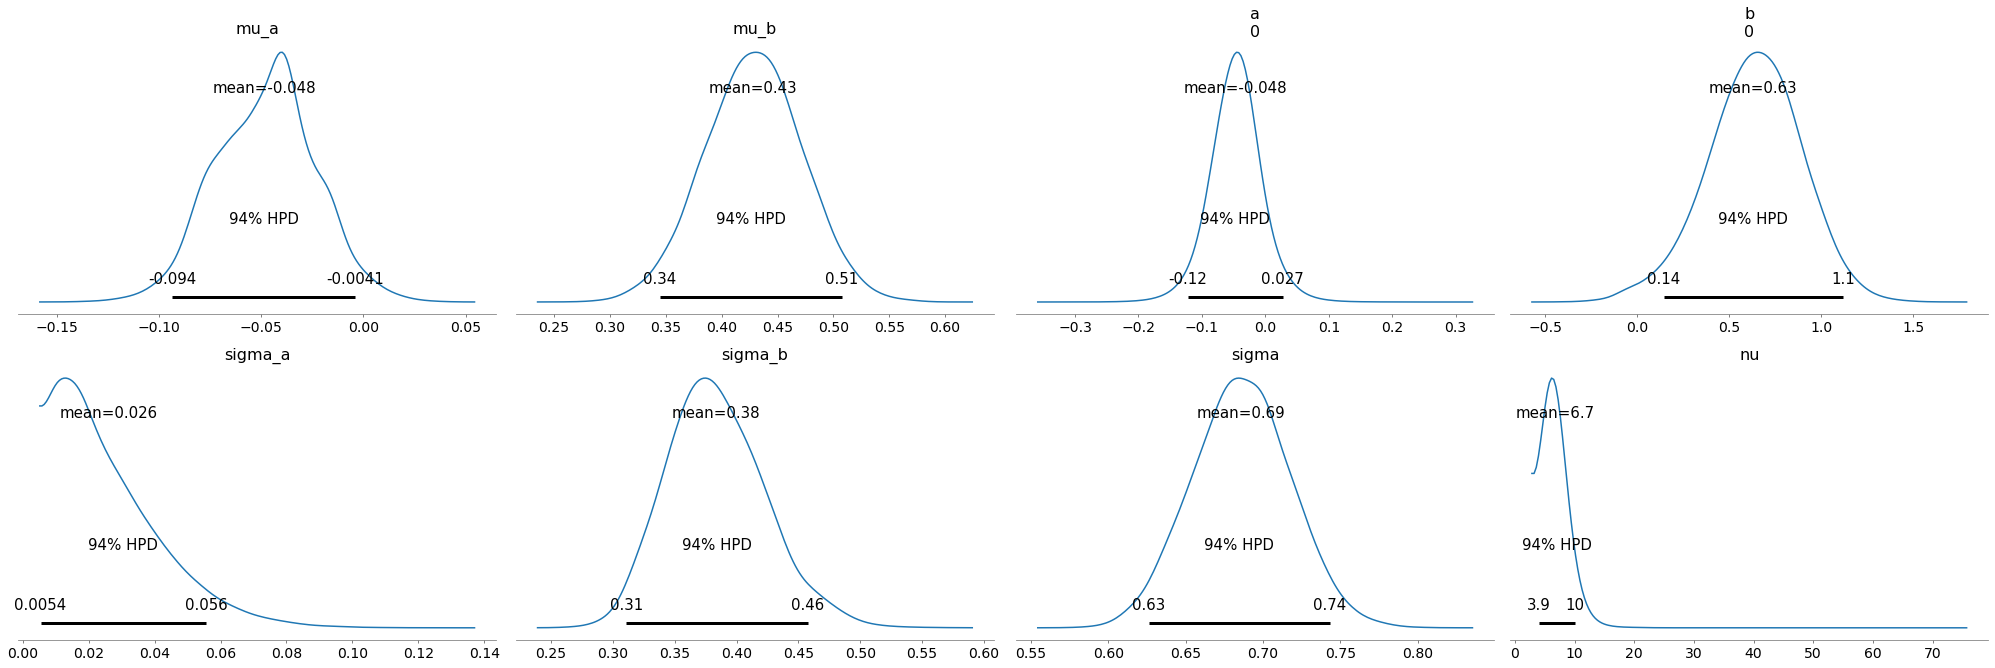

In [223]:
pm.plot_posterior(m1_trace)

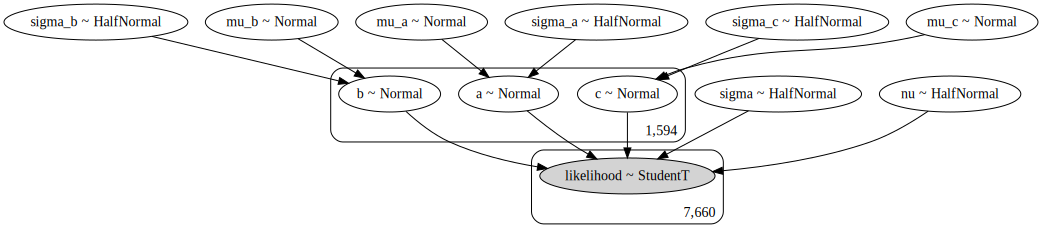

In [232]:
pm.model_to_graphviz(m2)

In [233]:
with m2:
    m2_trace = pm.load_trace(directory="./remote/m2_trace")

TraceDirectoryError: ./remote/m2_trace is not a PyMC3 saved chain directory.

In [228]:
# with pm.Model() as test:
#     grp_mean = pm.Normal('grp_mean', mu=0, sigma=10)
#     grp_sd = pm.Uniform('grp_sd', lower=1)
#     # Define priors for intercept and regression coefficients.
#     priors = {'Intercept': pm.Normal.dist(mu=grp_mean, sigma=grp_sd),
#               'zyear': pm.Normal.dist(mu=grp_mean, sigma=grp_sd),
#               }
#     pm.GLM.from_formula('zvalue ~ zyear', expenditureTotalAdjusted_melted, priors=priors)
#     test_trace = pm.sample(2000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, zyear, Intercept, grp_sd, grp_mean]
Sampling 2 chains, 0 divergences:   0%|          | 0/8000 [01:56<?, ?draws/s]


ValueError: Not enough samples to build a trace.

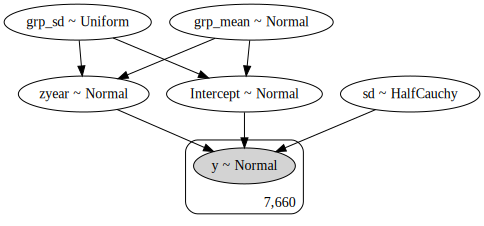

In [229]:
pm.model_to_graphviz(test)

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd

expenditureTotalAdjusted_melted = pd.read_pickle('./ETAM.pickle')

with pm.Model() as m2:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 5.)

    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[expenditureTotalAdjusted_melted.code.values] + \
        b[expenditureTotalAdjusted_melted.code.values]*expenditureTotalAdjusted_melted.zyear.values + \
        c[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2)

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

with m2:
    m2_trace = pm.sample(20000, tune=20000)

pm.save_trace(m2_trace, directory="./m2_trace")

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd

expenditureTotalAdjusted_melted = pd.read_pickle('./ETAM.pickle')

with pm.Model() as m3:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sigma=10)
    sigma_d = pm.HalfNormal('sigma_d', 5.)
    
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[expenditureTotalAdjusted_melted.code.values] + \
        b[expenditureTotalAdjusted_melted.code.values]*expenditureTotalAdjusted_melted.zyear.values + \
        c[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2) + \
        d[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 3)
    
    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

with m3:
    m3_trace = pm.sample(20000, tune=20000)

pm.save_trace(m3_trace, directory="./m3_trace")

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd

expenditureTotalAdjusted_melted = pd.read_pickle('./ETAM.pickle')

with pm.Model() as m4:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sigma=10)
    sigma_d = pm.HalfNormal('sigma_d', 5.)
    mu_e = pm.Normal('mu_e', mu=0., sigma=10)
    sigma_e = pm.HalfNormal('sigma_e', 5.)
    
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=1600)
    e = pm.Normal('e', mu=mu_e, sigma=sigma_e, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[expenditureTotalAdjusted_melted.code.values] + \
        b[expenditureTotalAdjusted_melted.code.values]*expenditureTotalAdjusted_melted.zyear.values + \
        c[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2) + \
        d[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 3) + \
        e[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 4)
    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

with m4:
    m4_trace = pm.sample(20000, tune=20000)

pm.save_trace(m4_trace, directory="./m4_trace")

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd

expenditureTotalAdjusted_melted = pd.read_pickle('./ETAM.pickle')

with pm.Model() as m5:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sigma=10)
    sigma_d = pm.HalfNormal('sigma_d', 5.)
    mu_e = pm.Normal('mu_e', mu=0., sigma=10)
    sigma_e = pm.HalfNormal('sigma_e', 5.)
    mu_f = pm.Normal('mu_f', mu=0., sigma=10)
    sigma_f = pm.HalfNormal('sigma_f', 5.)
    
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=1600)
    e = pm.Normal('e', mu=mu_e, sigma=sigma_e, shape=1600)
    f = pm.Normal('f', mu=mu_f, sigma=sigma_f, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[expenditureTotalAdjusted_melted.code.values] + \
        b[expenditureTotalAdjusted_melted.code.values]*expenditureTotalAdjusted_melted.zyear.values + \
        c[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2) + \
        d[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 3) + \
        e[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 4) + \
        f[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 5)
    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

with m5:
    m5_trace = pm.sample(20000, tune=20000)

pm.save_trace(m5_trace, directory="./m5_trace")

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd

expenditureTotalAdjusted_melted = pd.read_pickle('./ETAM.pickle')

with pm.Model() as m6:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=10)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=10)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sigma=10)
    sigma_d = pm.HalfNormal('sigma_d', 5.)
    mu_e = pm.Normal('mu_e', mu=0., sigma=10)
    sigma_e = pm.HalfNormal('sigma_e', 5.)
    mu_f = pm.Normal('mu_f', mu=0., sigma=10)
    sigma_f = pm.HalfNormal('sigma_f', 5.)
    mu_g = pm.Normal('mu_g', mu=0., sigma=10)
    sigma_g = pm.HalfNormal('sigma_g', 5.)
    
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=1600)
    e = pm.Normal('e', mu=mu_e, sigma=sigma_e, shape=1600)
    f = pm.Normal('f', mu=mu_f, sigma=sigma_f, shape=1600)
    g = pm.Normal('g', mu=mu_g, sigma=sigma_g, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[expenditureTotalAdjusted_melted.code.values] + \
        b[expenditureTotalAdjusted_melted.code.values]*expenditureTotalAdjusted_melted.zyear.values + \
        c[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2) + \
        d[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 3) + \
        e[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 4) + \
        f[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 5) + \
        g[expenditureTotalAdjusted_melted.code.values]*np.power(expenditureTotalAdjusted_melted.zyear.values, 6)
    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

with m6:
    m6_trace = pm.sample(20000, tune=20000)

pm.save_trace(m6_trace, directory="./m6_trace")

In [235]:
with pm.Model() as m2:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=100)
    sigma_c = pm.HalfNormal('sigma_c', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = a[code] + b[code]*expenditureTotalAdjusted_melted.zyear.values + c[code]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2)

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

In [236]:
with m2:
    m2_trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, c, b, a, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]
Sampling 4 chains, 2,192 divergences: 100%|██████████| 16000/16000 [04:56<00:00, 53.88draws/s] 
There were 1422 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.20718484109134996, but should be close to 0.8. Try to increase the number of tuning steps.
There were 346 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.12558439216264394, but should be close to 0.8. Try to increase the number of tuning steps.
There were 391 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5250839182563835, but should be close to 0.8. Try to increase the number of tuning steps.
The

In [237]:
pm.summary(m2_trace)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu_a    -0.016  0.014  -0.037    0.011      0.006    0.004       6.0     6.0   
mu_b     0.198  0.013   0.173    0.223      0.001    0.001     119.0   118.0   
mu_c    -0.040  0.014  -0.068   -0.020      0.005    0.004       7.0     7.0   
a[0]    -0.016  0.019  -0.050    0.022      0.006    0.004      10.0    10.0   
a[1]    -0.015  0.019  -0.049    0.022      0.006    0.004      11.0    11.0   
...        ...    ...     ...      ...        ...      ...       ...     ...   
c[1599] -0.041  0.020  -0.077   -0.005      0.006    0.004      13.0    12.0   
sigma_a  0.012  0.004   0.005    0.019      0.002    0.001       6.0     6.0   
sigma_b  0.298  0.016   0.269    0.327      0.003    0.002      30.0    29.0   
sigma_c  0.014  0.004   0.005    0.021      0.002    0.001       7.0     7.0   
sigma    0.910  0.008   0.895    0.923      0.000    0.000     317.0   317.0   

         ess_bulk  ess_tail  r_hat  
mu_a          6.0      15.0   1.76  
mu_b        121.0     908.0   1.02  
mu_c          8.0      33.0   1.44  
a[0]         11.0      26.0   1.26  
a[1]         11.0      22.0   1.26  
...           ...       ...    ...  
c[1599]      14.0      58.0   1.20  
sigma_a       6.0      12.0   1.69  
sigma_b      31.0      76.0   1.09  
sigma_c       8.0      11.0   1.42  
sigma       314.0     616.0   1.01  

[4807 rows x 11 columns]

In [242]:
with pm.Model() as m3:

    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sigma=100)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sigma=100)
    sigma_d = pm.HalfNormal('sigma_d', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=1600)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=1600)
    c = pm.Normal('c', mu=mu_c, sigma=sigma_c, shape=1600)
    d = pm.Normal('d', mu=mu_d, sigma=sigma_d, shape=1600)
    # Model error
    sigma = pm.HalfCauchy('sigma', 5.)

    y = (a[code] +
         b[code]*expenditureTotalAdjusted_melted.zyear.values +
         c[code]*np.power(expenditureTotalAdjusted_melted.zyear.values, 2) +
         d[code]*np.power(expenditureTotalAdjusted_melted.zyear.values, 3))

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y, sigma=sigma, observed=expenditureTotalAdjusted_melted.zvalue.values)

In [244]:
with m3:
    m3_trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, d, c, b, a, sigma_d, mu_d, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains, 0 divergences:   0%|          | 0/16000 [02:42<?, ?draws/s]


ValueError: Not enough samples to build a trace.

In [ ]:
# model comparison

In [240]:
dfwaic = pm.compare({test: test_trace, m2: m2_trace, m3: m3_trace}, ic='WAIC')
# dfwaic.index = pd.MultiIndex.from_tuples(
#     [tuple(k.split(',')) for k,v in dfwaic.iterrows()])

dfwaic

/Users/hwang/.conda/envs/bayesian/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


rank     waic   p_waic   d_waic  \
<pymc3.model.Model object at 0x7f88598de510>    0  20819.1  472.284        0   
<pymc3.model.Model object at 0x7f897e9501d0>    1  20821.6  462.532  2.46836   

                                                weight       se      dse  \
<pymc3.model.Model object at 0x7f88598de510>  0.597259  114.962        0   
<pymc3.model.Model object at 0x7f897e9501d0>  0.402741  115.183  8.86949   

                                             warning waic_scale  
<pymc3.model.Model object at 0x7f88598de510>    True   deviance  
<pymc3.model.Model object at 0x7f897e9501d0>    True   deviance

In [ ]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    radon_like = pm.Normal('radon_like', mu=radon_est,
                           sigma=eps, observed=data.log_radon)

In [277]:
county_idx = data.county_code.values

In [278]:
county_idx

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 20, 20

In [124]:
data = pd.read_csv(pm.get_data('radon.csv'))

In [125]:
data

Unnamed: 0   idnum state state2  stfips    zip  region  typebldg  floor  \
0             0  5081.0    MN     MN    27.0  55735     5.0       1.0    1.0   
1             1  5082.0    MN     MN    27.0  55748     5.0       1.0    0.0   
2             2  5083.0    MN     MN    27.0  55748     5.0       1.0    0.0   
3             3  5084.0    MN     MN    27.0  56469     5.0       1.0    0.0   
4             4  5085.0    MN     MN    27.0  55011     3.0       1.0    0.0   
..          ...     ...   ...    ...     ...    ...     ...       ...    ...   
914         914  5995.0    MN     MN    27.0  55363     5.0       1.0    0.0   
915         915  5996.0    MN     MN    27.0  55376     5.0       1.0    0.0   
916         916  5997.0    MN     MN    27.0  55376     5.0       1.0    0.0   
917         917  5998.0    MN     MN    27.0  56297     5.0       1.0    0.0   
918         918  5999.0    MN     MN    27.0  56297     5.0       1.0    0.0   

     room  ... pcterr        adjwt  dupflag  zipflag  cntyfips  \
0     3.0  ...    9.7  1146.499190      1.0      0.0       1.0   
1     4.0  ...   14.5   471.366223      0.0      0.0       1.0   
2     4.0  ...    9.6   433.316718      0.0      0.0       1.0   
3     4.0  ...   24.3   461.623670      0.0      0.0       1.0   
4     4.0  ...   13.8   433.316718      0.0      0.0       3.0   
..    ...  ...    ...          ...      ...      ...       ...   
914   4.0  ...    4.5  1146.499190      0.0      0.0     171.0   
915   7.0  ...    8.3  1105.956867      0.0      0.0     171.0   
916   4.0  ...    5.2  1214.922779      0.0      0.0     171.0   
917   4.0  ...    9.6  1177.377355      0.0      0.0     173.0   
918   4.0  ...    8.0  1214.922779      0.0      0.0     173.0   

              county     fips      Uppm  county_code  log_radon  
0             AITKIN  27001.0  0.502054            0   0.832909  
1             AITKIN  27001.0  0.502054            0   0.832909  
2             AITKIN  27001.0  0.502054            0   1.098612  
3             AITKIN  27001.0  0.502054            0   0.095310  
4              ANOKA  27003.0  0.428565            1   1.163151  
..               ...      ...       ...          ...        ...  
914           WRIGHT  27171.0  0.913909           83   1.871802  
915           WRIGHT  27171.0  0.913909           83   1.526056  
916           WRIGHT  27171.0  0.913909           83   1.629241  
917  YELLOW MEDICINE  27173.0  1.426590           84   1.335001  
918  YELLOW MEDICINE  27173.0  1.426590           84   1.098612  

[919 rows x 30 columns]

In [128]:
data['log_radon'] = data['log_radon'].astype(theano.config.floatX)

In [131]:
county_names = data.county.unique()

In [148]:
data.county

0               AITKIN
1               AITKIN
2               AITKIN
3               AITKIN
4                ANOKA
            ...       
914             WRIGHT
915             WRIGHT
916             WRIGHT
917    YELLOW MEDICINE
918    YELLOW MEDICINE
Name: county, Length: 919, dtype: object

In [132]:
data.county_code

0       0
1       0
2       0
3       0
4       1
       ..
914    83
915    83
916    83
917    84
918    84
Name: county_code, Length: 919, dtype: int64

In [ ]:
with Model() as test:
    grp_mean = Normal('grp_mean', mu=0, sigma=10)
    grp_sd = Uniform('grp_sd', 0, 200)
    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std()),
              'spend': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'stu_tea_rat': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'salary': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'prcnt_take': Normal.dist(mu=grp_mean, sigma=grp_sd)
              }
    GLM.from_formula(
        'sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data, priors=priors)
    trace_sat = sample(2000, cores=2)

In [104]:
sat_data = pd.read_csv('Guber1999data.txt')

In [105]:
sat_data

spend  stu_tea_rat  salary  prcnt_take  sat_v  sat_m  sat_t
Alabama         4.405         17.2  31.144           8    491    538   1029
Alaska          8.963         17.6  47.951          47    445    489    934
Arizona         4.778         19.3  32.175          27    448    496    944
Arkansas        4.459         17.1  28.934           6    482    523   1005
California      4.992         24.0  41.078          45    417    485    902
Colorado        5.443         18.4  34.571          29    462    518    980
Connecticut     8.817         14.4  50.045          81    431    477    908
Delaware        7.030         16.6  39.076          68    429    468    897
Florida         5.718         19.1  32.588          48    420    469    889
Georgia         5.193         16.3  32.291          65    406    448    854
Hawaii          6.078         17.9  38.518          57    407    482    889
Idaho           4.210         19.1  29.783          15    468    511    979
Illinois        6.136         17.3  39.431          13    488    560   1048
Indiana         5.826         17.5  36.785          58    415    467    882
Iowa            5.483         15.8  31.511           5    516    583   1099
Kansas          5.817         15.1  34.652           9    503    557   1060
Kentucky        5.217         17.0  32.257          11    477    522    999
Louisiana       4.761         16.8  26.461           9    486    535   1021
Maine           6.428         13.8  31.972          68    427    469    896
Maryland        7.245         17.0  40.661          64    430    479    909
Massachusetts   7.287         14.8  40.795          80    430    477    907
Michigan        6.994         20.1  41.895          11    484    549   1033
Minnesota       6.000         17.5  35.948           9    506    579   1085
Mississippi     4.080         17.5  26.818           4    496    540   1036
Missouri        5.383         15.5  31.189           9    495    550   1045
Montana         5.692         16.3  28.785          21    473    536   1009
Nebraska        5.935         14.5  30.922           9    494    556   1050
Nevada          5.160         18.7  34.836          30    434    483    917
New,Hampshire   5.859         15.6  34.720          70    444    491    935
New,Jersey      9.774         13.8  46.087          70    420    478    898
New,Mexico      4.586         17.2  28.493          11    485    530   1015
New,York        9.623         15.2  47.612          74    419    473    892
North,Carolina  5.077         16.2  30.793          60    411    454    865
North,Dakota    4.775         15.3  26.327           5    515    592   1107
Ohio            6.162         16.6  36.802          23    460    515    975
Oklahoma        4.845         15.5  28.172           9    491    536   1027
Oregon          6.436         19.9  38.555          51    448    499    947
Pennsylvania    7.109         17.1  44.510          70    419    461    880
Rhode,Island    7.469         14.7  40.729          70    425    463    888
South,Carolina  4.797         16.4  30.279          58    401    443    844
South,Dakota    4.775         14.4  25.994           5    505    563   1068
Tennessee       4.388         18.6  32.477          12    497    543   1040
Texas           5.222         15.7  31.223          47    419    474    893
Utah            3.656         24.3  29.082           4    513    563   1076
Vermont         6.750         13.8  35.406          68    429    472    901
Virginia        5.327         14.6  33.987          65    428    468    896
Washington      5.906         20.2  36.151          48    443    494    937
West,Virginia   6.107         14.8  31.944          17    448    484    932
Wisconsin       6.930         15.9  37.746           9    501    572   1073
Wyoming         6.160         14.9  31.285          10    476    525   1001

In [ ]:
with Model() as model_sat:
    grp_mean = Normal('grp_mean', mu=0, sigma=10)
    grp_sd = Uniform('grp_sd', 0, 200)
    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std()),
              'spend': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'stu_tea_rat': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'salary': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'prcnt_take': Normal.dist(mu=grp_mean, sigma=grp_sd)
              }
    GLM.from_formula(
        'sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data, priors=priors)
    trace_sat = sample(2000, cores=2)

In [94]:
pm.glm.families.Normal()

Family <class 'pymc3.glm.families.Normal'>:
    Likelihood   : Normal(mu)
    Priors       : {'sd': <pymc3.distributions.continuous.HalfCauchy object at 0x7f892abdcf10>}
    Link function: <pymc3.glm.families.Identity object at 0x7f892abdced0>.

In [96]:
k=5
fml = 'y ~ 1 + x ' + ' '.join(['+ np.power(x,{})'.format(j) for j in range(2, k+1)]).strip()

In [100]:
df = dfs_lin

In [101]:
pm.glm.GLM.from_formula(fml, df, priors={'Intercept':
                                 pm.Normal.dist(mu=0, sigma=100)},
                                 family=pm.glm.families.Normal())


In [ ]:


def create_poly_modelspec(k=1):
    '''
    Convenience function:
    Create a polynomial modelspec string for patsy
    '''
    return ('y ~ 1 + x ' + ' '.join(['+ np.power(x,{})'.format(j)
                                     for j in range(2, k+1)])).strip()


def run_models(df, upper_order=5):
    '''
    Convenience function:
    Fit a range of pymc3 models of increasing polynomial complexity.
    Suggest limit to max order 5 since calculation time is exponential.
    '''

    models, traces = OrderedDict(), OrderedDict()

    for k in range(1, upper_order+1):

        nm = 'k{}'.format(k)
        fml = create_poly_modelspec(k)

        with pm.Model() as models[nm]:

            print('\nRunning: {}'.format(nm))
            pm.glm.GLM.from_formula(fml, df,
                                    priors={'Intercept':
                                            pm.Normal.dist(
                                            mu=0, sigma=100)},
                                    family=pm.glm.families.Normal())

            traces[nm] = pm.sample(2000, tune=1000, init='advi+adapt_diag')

    return models, traces

In [ ]:
with pm.Model() as wordLen_inTermsOf_syll:
    
    # prior on θ_prf, second level
    μ_prf = pm.Uniform('μ_prf', lower=0, upper=5)
    τ_prf = pm.HalfNormal('τ_prf', sd=2)
    # prior on σ_prf, second level
    α_prf = pm.HalfNormal('α_prf', sd=2)
    β_prf = pm.HalfNormal('β_prf', sd=2)
    # first level
    θ_prf = pm.Normal('θ_prf', mu=μ_prf, sd=τ_prf, shape=category_count)
    σ_prf = pm.Gamma('σ_prf', alpha=α_prf, beta=β_prf, shape=category_count)

    # prior on θ_ctr, second level
    μ_ctr = pm.Uniform('μ_ctr', lower=0, upper=5)
    τ_ctr = pm.HalfNormal('τ_ctr', sd=2)
    # prior on σ_ctr, second level
    α_ctr = pm.HalfNormal('α_ctr', sd=2)
    β_ctr = pm.HalfNormal('β_ctr', sd=2)
    # first level
    θ_ctr = pm.Normal('θ_ctr', mu=μ_ctr, sd=τ_ctr, shape=category_count)
    σ_ctr = pm.Gamma('σ_ctr', alpha=α_ctr, beta=β_ctr, shape=category_count)
    
    # likelihoods
    y_prf = pm.Normal('y_prf', mu=θ_prf[idx_wordLen_inTermsOf_syll_prf], sd=σ_prf[idx_wordLen_inTermsOf_syll_prf], observed=df_wordLen_inTermsOf_syll_prf.y)
    y_ctr = pm.Normal('y_ctr', mu=θ_ctr[idx_wordLen_inTermsOf_syll_ctr], sd=σ_ctr[idx_wordLen_inTermsOf_syll_ctr], observed=df_wordLen_inTermsOf_syll_ctr.y)
    
    # transfer back to the original scale
    θ_ctr_ori = pm.Deterministic('θ_ctr_ori', θ_ctr**2)
    σ_ctr_ori = pm.Deterministic('σ_ctr_ori', σ_ctr**2)
    μ_ctr_ori = pm.Deterministic('μ_ctr_ori', μ_ctr**2)
    τ_ctr_ori = pm.Deterministic('τ_ctr_ori', τ_ctr**2)
    α_ctr_ori = pm.Deterministic('α_ctr_ori', α_ctr**2)
    β_ctr_ori = pm.Deterministic('β_ctr_ori', β_ctr**2)
    
    θ_prf_ori = pm.Deterministic('θ_prf_ori', θ_prf**2)
    σ_prf_ori = pm.Deterministic('σ_prf_ori', σ_prf**2)
    μ_prf_ori = pm.Deterministic('μ_prf_ori', μ_prf**2)
    τ_prf_ori = pm.Deterministic('τ_prf_ori', τ_prf**2)
    α_prf_ori = pm.Deterministic('α_prf_ori', α_prf**2)
    β_prf_ori = pm.Deterministic('β_prf_ori', β_prf**2)
    # r/s is the Gamma(α, β) mean ,squar(s)/r is the variation, (s-1)/r is the mode
    η_ctr_ori = pm.Deterministic('η_ctr_ori', α_ctr**2/β_ctr**2)
    ζ_ctr_ori = pm.Deterministic('ζ_ctr_ori', α_ctr/β_ctr**2)
    ψ_ctr_ori = pm.Deterministic('ψ_ctr_ori', (α_ctr**2-1)/β_ctr**2)
    
    η_prf_ori = pm.Deterministic('η_prf_ori', α_prf**2/β_prf**2)
    ζ_prf_ori = pm.Deterministic('ζ_prf_ori', α_prf/β_prf**2)
    ψ_prf_ori = pm.Deterministic('ψ_prf_ori', (α_prf**2-1)/β_prf**2)
    
    effect_size = pm.Deterministic("effect size", (μ_ctr_ori-μ_prf_ori)/np.sqrt((η_ctr_ori**2+η_prf_ori**2)/2))
    
#     trace_wordLen_inTermsOf_syll = pm.sample(5000, tune=5000)
    trace_wordLen_inTermsOf_syll=pm.load_trace(directory="./traces/trace_wordLen_inTermsOf_syll")

In [ ]:
# tutorial

In [70]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from ipywidgets import interactive, fixed

plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))
rndst = np.random.RandomState(0)

Running on PyMC3 v3.8


In [68]:
def generate_data(n=20, p=0, a=1, b=1, c=0, latent_sigma_y=20):
    '''
    Create a toy dataset based on a very simple model that we might
    imagine is a noisy physical process:
        1. random x values within a range
        2. latent error aka inherent noise in y
        3. optionally create labelled outliers with larger noise

    Model form: y ~ a + bx + cx^2 + e

    NOTE: latent_sigma_y is used to create a normally distributed,
    'latent error' aka 'inherent noise' in the 'physical' generating
    process, rather than experimental measurement error.
    Please don't use the returned `latent_error` values in inferential
    models, it's returned in the dataframe for interest only.
    '''

    df = pd.DataFrame({'x': rndst.choice(np.arange(100), n, replace=False)})

    # create linear or quadratic model
    df['y'] = a + b*(df['x']) + c*(df['x'])**2

    # create latent noise and marked outliers
    df['latent_error'] = rndst.normal(0, latent_sigma_y, n)
    df['outlier_error'] = rndst.normal(0, latent_sigma_y*10, n)
    df['outlier'] = rndst.binomial(1, p, n)

    # add noise, with extreme noise for marked outliers
    df['y'] += ((1-df['outlier']) * df['latent_error'])
    df['y'] += (df['outlier'] * df['outlier_error'])

    # round
    for col in ['y', 'latent_error', 'outlier_error', 'x']:
        df[col] = np.round(df[col], 3)

    # add label
    df['source'] = 'linear' if c == 0 else 'quadratic'

    # create simple linspace for plotting true model
    plotx = np.linspace(df['x'].min() - np.ptp(df['x'].values)*.1,
                        df['x'].max() + np.ptp(df['x'].values)*.1, 100)

    ploty = a + b * plotx + c * plotx ** 2
    dfp = pd.DataFrame({'x': plotx, 'y': ploty})

    return df, dfp


def interact_dataset(n=20, p=0, a=-30, b=5, c=0, latent_sigma_y=20):
    '''
    Convenience function:
    Interactively generate dataset and plot
    '''

    df, dfp = generate_data(n, p, a, b, c, latent_sigma_y)

    g = sns.FacetGrid(df, height=8, hue='outlier', hue_order=[True, False],
                      palette=sns.color_palette('Set1'), legend_out=False)

    g.map(plt.errorbar, 'x', 'y', 'latent_error', marker="o",
          ms=10, mec='w', mew=2, ls='', elinewidth=0.7).add_legend()

    plt.plot(dfp['x'], dfp['y'], '--', alpha=0.8)

    plt.subplots_adjust(top=0.92)
    g.fig.suptitle('Sketch of Data Generation ({})'.format(
        df['source'][0]), fontsize=16)


def plot_datasets(df_lin, df_quad, dfp_lin, dfp_quad):
    '''
    Convenience function:
    Plot the two generated datasets in facets with generative model
    '''

    df = pd.concat((df_lin, df_quad), axis=0)

    g = sns.FacetGrid(col='source', hue='source', data=df, height=6,
                      sharey=False, legend_out=False)

    g.map(plt.scatter, 'x', 'y', alpha=0.7, s=100, lw=2, edgecolor='w')

    g.axes[0][0].plot(dfp_lin['x'], dfp_lin['y'], '--', alpha=0.6)
    g.axes[0][1].plot(dfp_quad['x'], dfp_quad['y'], '--', alpha=0.6)


def plot_traces(traces, retain=1000):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i, 0].annotate('{:.2f}'.format(mn), xy=(mn, 0), xycoords='data',
                          xytext=(5, 10), textcoords='offset points', rotation=90,
                          va='bottom', fontsize='large', color='#AA0022')


def create_poly_modelspec(k=1):
    '''
    Convenience function:
    Create a polynomial modelspec string for patsy
    '''
    return ('y ~ 1 + x ' + ' '.join(['+ np.power(x,{})'.format(j)
                                     for j in range(2, k+1)])).strip()


def run_models(df, upper_order=5):
    '''
    Convenience function:
    Fit a range of pymc3 models of increasing polynomial complexity.
    Suggest limit to max order 5 since calculation time is exponential.
    '''

    models, traces = OrderedDict(), OrderedDict()

    for k in range(1, upper_order+1):

        nm = 'k{}'.format(k)
        fml = create_poly_modelspec(k)

        with pm.Model() as models[nm]:

            print('\nRunning: {}'.format(nm))
            pm.glm.GLM.from_formula(fml, df,
                                    priors={'Intercept':
                                            pm.Normal.dist(
                                            mu=0, sigma=100)},
                                    family=pm.glm.families.Normal())

            traces[nm] = pm.sample(2000, tune=1000, init='advi+adapt_diag')

    return models, traces


def plot_posterior_cr(models, traces, rawdata, xlims,
                      datamodelnm='linear', modelnm='k1'):
    '''
    Convenience function:
    Plot posterior predictions with credible regions shown as filled areas.
    '''

    # Get traces and calc posterior prediction for npoints in x
    npoints = 100
    mdl = models[modelnm]
    trc = pm.trace_to_dataframe(traces[modelnm][-1000:])
    trc = trc[[str(v) for v in mdl.cont_vars[:-1]]]

    ordr = int(modelnm[-1:])
    x = np.linspace(xlims[0], xlims[1], npoints).reshape((npoints, 1))
    pwrs = np.ones((npoints, ordr+1)) * np.arange(ordr+1)
    X = x ** pwrs
    cr = np.dot(X, trc.T)

    # Calculate credible regions and plot over the datapoints
    dfp = pd.DataFrame(np.percentile(cr, [2.5, 25, 50, 75, 97.5], axis=1).T,
                       columns=['025', '250', '500', '750', '975'])
    dfp['x'] = x

    pal = sns.color_palette('Greens')
    f, ax1d = plt.subplots(1, 1, figsize=(7, 7))
    f.suptitle('Posterior Predictive Fit -- Data: {} -- Model: {}'.format(datamodelnm,
                                                                          modelnm), fontsize=16)
    plt.subplots_adjust(top=0.95)

    ax1d.fill_between(dfp['x'], dfp['025'], dfp['975'], alpha=0.5,
                      color=pal[1], label='CR 95%')
    ax1d.fill_between(dfp['x'], dfp['250'], dfp['750'], alpha=0.5,
                      color=pal[4], label='CR 50%')
    ax1d.plot(dfp['x'], dfp['500'], alpha=0.6, color=pal[5], label='Median')

    plt.legend()
    ax1d.set_xlim(xlims)
    sns.regplot(x='x', y='y', data=rawdata, fit_reg=False,
                scatter_kws={'alpha': 0.7, 's': 100, 'lw': 2, 'edgecolor': 'w'}, ax=ax1d)

In [71]:
n = 12
df_lin, dfp_lin = generate_data(n=n, p=0, a=-30, b=5, c=0, latent_sigma_y=40)
df_quad, dfp_quad = generate_data(n=n, p=0, a=-200, b=2, c=3, latent_sigma_y=500)

In [72]:
df_lin

x        y  latent_error  outlier_error  outlier  source
0   26  117.016        17.016         68.400        0  linear
1   86  398.881        -1.119       -690.269        0  linear
2    2   39.040        59.040         64.263        0  linear
3   55  270.871        25.871       -343.594        0  linear
4   75  330.427       -14.573        -82.568        0  linear
5   93  407.849       -27.151        195.371        0  linear
6   16   35.855       -14.145       -335.332        0  linear
7   73  305.370       -29.630        152.465        0  linear
8   54  212.999       -27.001       -396.361        0  linear
9   95  439.689        -5.311        407.152        0  linear
10  53  259.792        24.792        136.635        0  linear
11  92  501.647        71.647       -500.354        0  linear

In [73]:
dfp_lin

x           y
0    -7.300000  -66.500000
1    -6.172727  -60.863636
2    -5.045455  -55.227273
3    -3.918182  -49.590909
4    -2.790909  -43.954545
..         ...         ...
95   99.790909  468.954545
96  100.918182  474.590909
97  102.045455  480.227273
98  103.172727  485.863636
99  104.300000  491.500000

[100 rows x 2 columns]

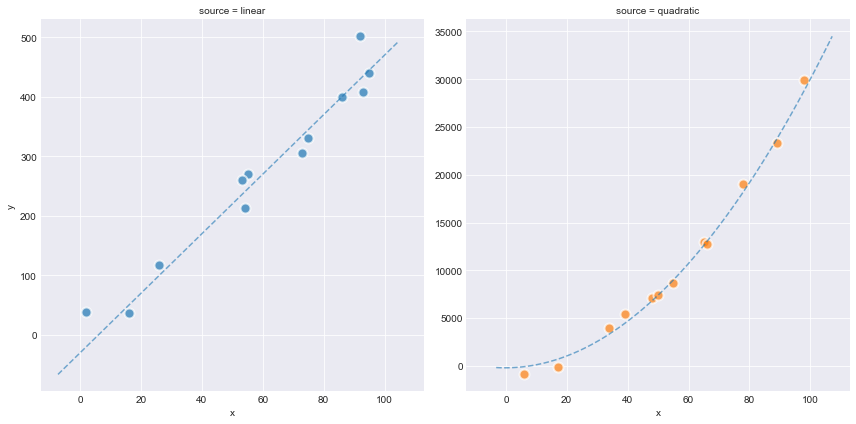

In [74]:
plot_datasets(df_lin, df_quad, dfp_lin, dfp_quad)

In [75]:
dfs_lin = df_lin.copy()
dfs_lin['x'] = (df_lin['x'] - df_lin['x'].mean()) / df_lin['x'].std()

dfs_quad = df_quad.copy()
dfs_quad['x'] = (df_quad['x'] - df_quad['x'].mean()) / df_quad['x'].std()

In [76]:
dfs_lin_xlims = (dfs_lin['x'].min() - np.ptp(dfs_lin['x'].values)/10,
                 dfs_lin['x'].max() + np.ptp(dfs_lin['x'].values)/10)

dfs_lin_ylims = (dfs_lin['y'].min() - np.ptp(dfs_lin['y'].values)/10,
                 dfs_lin['y'].max() + np.ptp(dfs_lin['y'].values)/10)

dfs_quad_ylims = (dfs_quad['y'].min() - np.ptp(dfs_quad['y'].values)/10,
                  dfs_quad['y'].max() + np.ptp(dfs_quad['y'].values)/10)

In [78]:
dfs_lin['y']

0     117.016
1     398.881
2      39.040
3     270.871
4     330.427
5     407.849
6      35.855
7     305.370
8     212.999
9     439.689
10    259.792
11    501.647
Name: y, dtype: float64

In [79]:
with pm.Model() as mdl_ols_glm:
    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': pm.Normal.dist(mu=0., sigma=100.),
              'x': pm.Normal.dist(mu=0., sigma=100.),
              }
    # setup model with Normal likelihood (which uses HalfCauchy for error prior)
    pm.glm.GLM.from_formula('y ~ 1 + x', df_lin, family=pm.glm.families.Normal())

    traces_ols_glm = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:03<00:00, 2739.88draws/s]
The acceptance probability does not match the target. It is 0.8863052002852059, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8938700327543923, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9002511856786078, but should be close to 0.8. Try to increase the number of tuning steps.


In [80]:
k=3
nm = 'k{}'.format(k)

In [81]:
nm

'k3'

In [82]:
('y ~ 1 + x ' + ' '.join(['+ np.power(x,{})'.format(j) for j in range(2, k+1)])).strip()

'y ~ 1 + x + np.power(x,2) + np.power(x,3)'

In [83]:
x=2
np.power(x,2)

4

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import theano

In [102]:
data = pd.read_csv(pm.get_data('radon.csv'))
data['log_radon'] = data['log_radon'].astype(theano.config.floatX)
county_names = data.county.unique()
county_idx = data.county_code.values

n_counties = len(data.county.unique())

In [103]:
data[['county', 'log_radon', 'floor', 'county_code']].head()

county  log_radon  floor  county_code
0  AITKIN   0.832909    1.0            0
1  AITKIN   0.832909    0.0            0
2  AITKIN   1.098612    0.0            0
3  AITKIN   0.095310    0.0            0
4   ANOKA   1.163151    0.0            1

In [ ]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    radon_like = pm.Normal('radon_like', mu=radon_est,
                           sigma=eps, observed=data.log_radon)

In [104]:
n_counties

85

In [94]:
n_libraries = len(expenditureTotalAdjusted_melted.school.unique())

In [95]:
len(expenditureTotalAdjusted_melted.school.unique())

1594

In [96]:
len(expenditureTotalAdjusted_melted.code.unique())

1594

In [97]:
expenditureTotalAdjusted_melted.zvalue

0      -0.788563
1       1.410956
2      -0.622392
3      -0.672818
4      -0.767647
          ...   
7655    0.000000
7656    0.000000
7657    0.000000
7658    0.000000
7659    0.000000
Name: zvalue, Length: 7660, dtype: float64

In [105]:
data.log_radon

0      0.832909
1      0.832909
2      1.098612
3      0.095310
4      1.163151
         ...   
914    1.871802
915    1.526056
916    1.629241
917    1.335001
918    1.098612
Name: log_radon, Length: 919, dtype: float64

In [363]:
expenditureTotalAdjusted_melted.zvalue

0      -0.788563
1       1.410956
2      -0.622392
3      -0.672818
4      -0.767647
          ...   
7659    0.000000
7660    0.000000
7661    0.000000
7662    0.000000
7663    0.000000
Name: zvalue, Length: 7664, dtype: float64

In [360]:
county_idx

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 20, 20

In [106]:
index[0:150]

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17])

In [107]:
data.floor.values

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [108]:
expenditureTotalAdjusted_melted.zyear.values[0:150]

array([-0.52223297,  1.5666989 , -1.21854359,  0.17407766, -1.21854359,
        1.5666989 , -0.87038828,  1.21854359,  0.87038828, -0.17407766,
        0.52223297, -1.5666989 , -0.52223297,  0.17407766,  1.21854359,
        0.87038828,  1.5666989 , -0.17407766, -0.52223297,  0.52223297,
       -0.87038828, -1.21854359, -1.5666989 , -0.17407766,  1.21854359,
        0.52223297,  0.87038828, -1.5666989 , -0.52223297,  1.5666989 ,
        0.17407766, -0.87038828,  1.21854359, -0.52223297,  0.52223297,
       -0.87038828,  0.17407766, -0.17407766, -1.5666989 ,  1.5666989 ,
        0.87038828, -0.52223297, -0.17407766,  1.5666989 ,  0.17407766,
       -1.21854359,  1.21854359,  0.52223297, -1.5666989 , -0.87038828,
        0.87038828,  0.87038828, -1.5666989 ,  1.5666989 , -0.52223297,
        0.17407766, -0.17407766,  0.52223297, -1.21854359,  1.21854359,
       -1.21854359,  0.17407766, -0.87038828,  0.52223297,  1.5666989 ,
       -0.17407766, -1.5666989 ,  0.87038828,  1.21854359, -0.52